In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries
import pandas as pd
from src.encoding import FontGraphemeAnalyzer

# Define the file paths for the CSV files
scripts_csv = "data/encoding/scripts.csv"
etymology_table_csv = "data/encoding/dotless_etymology.csv"
specific_encoding_csv = "data/encoding/alphabet_specific_encodings.csv"
font_encoding_csv = "data/encoding/dotless_encoding.csv"
data_dir = "data/fonts/"

fga = FontGraphemeAnalyzer(scripts_csv,
                           etymology_table_csv,
                           specific_encoding_csv,
                           font_encoding_csv,
                           data_dir)

/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


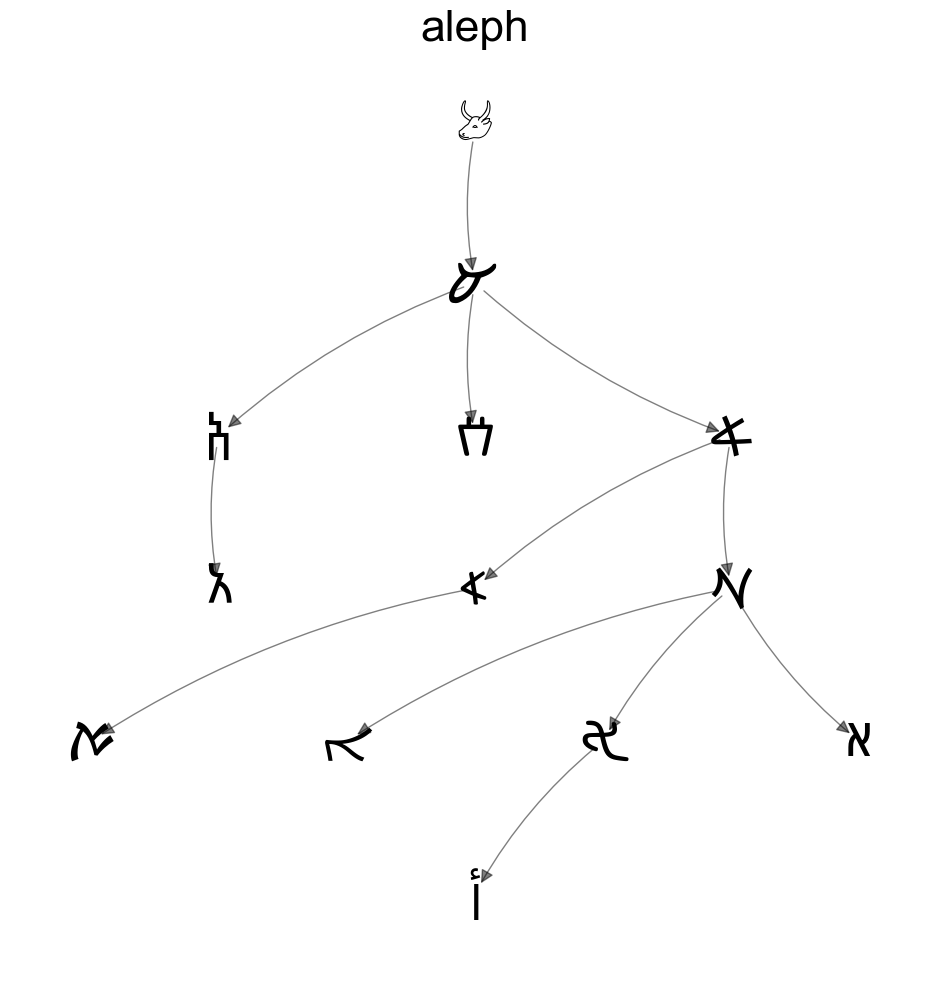

In [3]:
from src.evolution import plot_evolutionary_tree

relationships = {
    "Hieroglyph": ["Proto-Sinaitic"],
    "Proto-Sinaitic": ["Ancient South-Arabian", "Ancient North-Arabian", "Phoenician"],
    "Ancient South-Arabian": ["Ge'ez"],
    "Phoenician": ["Paleo-Hebrew", "Aramaic"],
    "Paleo-Hebrew": ["Samaritan"],
    "Aramaic": ["Syriac", "Nabataean", "Hebrew"],
    "Nabataean": ["Arabic"],
}

plot_evolutionary_tree("aleph", relationships, fga, "data/semiticRegular")

In [4]:
# Load the 'alphabet_allographic_etymology.csv' file and explore its contents
etymology_table_df = pd.read_csv(etymology_table_csv, index_col=0)
print(etymology_table_df.shape)
etymology_table_df.head()


(22, 25)


,Hieroglyph,Proto-Semitic,Akkadian,Ancient South-Arabian,Ge'ez,Ancient North-Arabian,Ugaritic,Proto-Sinaitic,Proto-Sinaitic B,Phoenician,...,Aramaic,Later Aramaic Alphabet,Nabataean,Arabic,Parthian,Palmyrene,Hatran,Elymaic,Pahlavi,Old Sogdian
Grepheme,,,,,,,,,,,,,,,,,,,,,
aleph,𓃾,ʔ,NaN,𐩱,አ,𐪑,𐎀,A,NaN,𐤀,...,𐡀,NaN,𐢀𐢁,أ,𐭀,𐡠,𐣠,𐿠,𐭠,𐼀𐼀
bet,𓉐,b,b,𐩨,በ,𐪈,𐎁,B,NaN,𐤁,...,𐡁,NaN,𐢂𐢃,ٮﯨ,𐭁,𐡡,𐣡,𐿡,𐭡,𐼂𐼃
gimmel,𓌙,ɡ,g,𐩴,ገ,𐪔,𐎂,G,NaN,𐤂,...,𐡂,NaN,𐢄,حﺣ,𐭂,𐡢,𐣢,𐿢,𐭢,𐼄
dalet,𓉿,d,d,𐩵,ደ,𐪕,𐎄,D,NaN,𐤃,...,𐡃,NaN,𐢅,دﺪ,𐭃,𐡣,𐣣,𐿣,𐭣,𐼘
he,𓀠,h,NaN,𐩠,ሀ,𐪀,NaN,H,NaN,𐤄,...,𐡄,NaN,𐢆𐢇,هﻫﻬﻪ,𐭄,𐡤,𐣤,𐿤,𐭤,𐼅𐼆


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


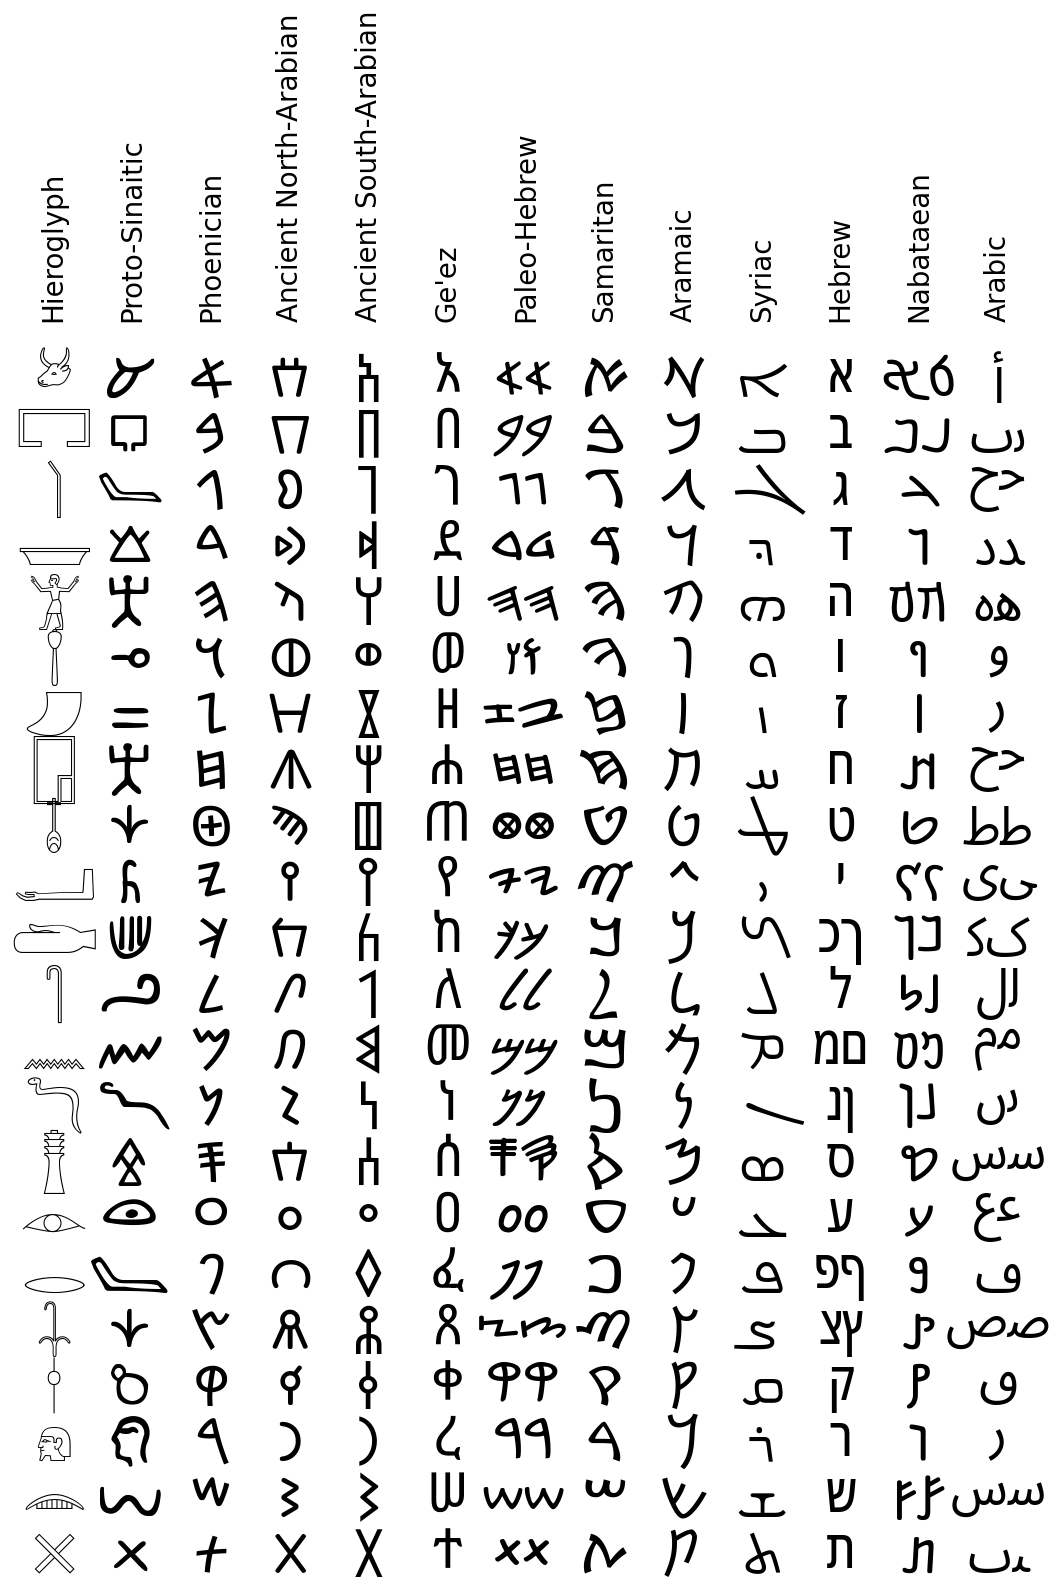

In [5]:
selected_scripts = ["Hieroglyph", "Proto-Sinaitic", "Phoenician", "Ancient North-Arabian",
                        "Ancient South-Arabian", "Ge'ez", "Paleo-Hebrew", "Samaritan", "Aramaic", "Syriac",
                        "Hebrew", "Nabataean", "Arabic"]

fga.plot_etymology_table(selected_scripts, "data/semiticRegular")

/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


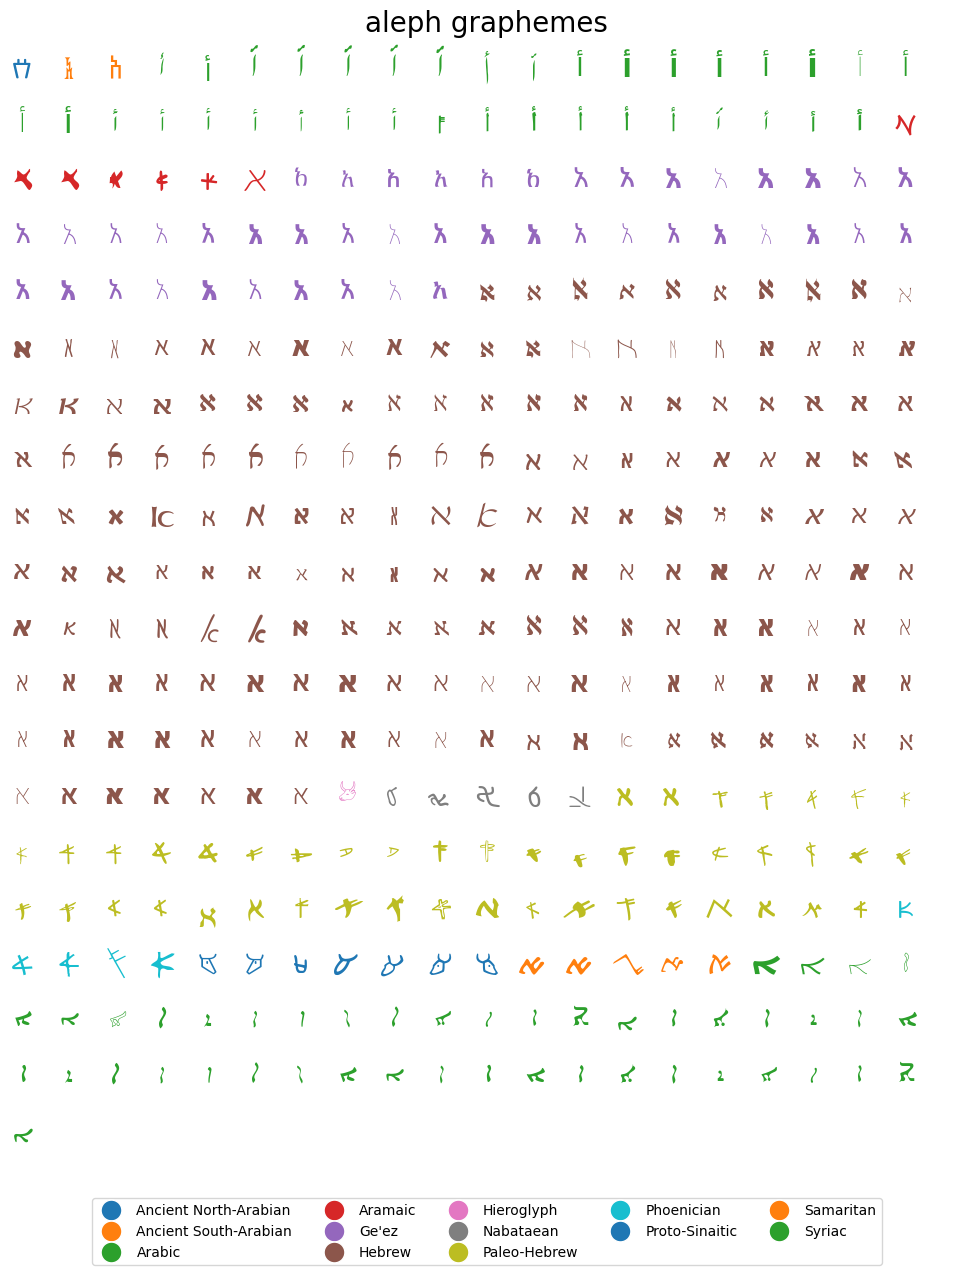

In [12]:
fga.plot_graphemes("aleph", selected_scripts)

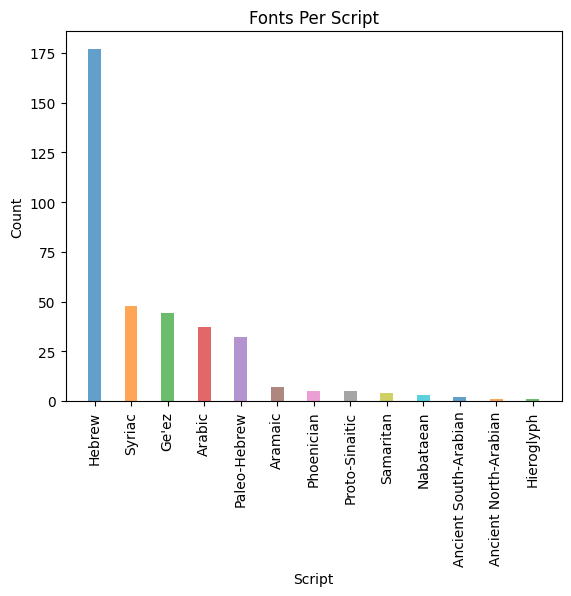

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# a bar plot of fga.font_encoding["script"] counts for each script
# the x locations for the groups
ind = np.arange(len(fga.font_encoding["script"].value_counts()))
# the width of the bars
width = 0.35
# Generating unique colors for each script
script_colors = {}  # Dictionary to map each script to a color
color_palette = plt.cm.tab10.colors
for idx, script in enumerate(selected_scripts):
    script_colors[script] = color_palette[idx % len(color_palette)]
colors = [script_colors[script] for script in selected_scripts]

# the bars
plt.bar(ind, fga.font_encoding["script"].value_counts(), width, color=colors, alpha=.7)
# axes and labels
plt.ylabel('Count')
plt.xlabel('Script')
plt.title('Fonts Per Script')
plt.xticks(ind, fga.font_encoding["script"].value_counts().index.tolist(), rotation=90)
plt.show()
